# The cell below is for 1-dimensional generation.

In [121]:
!pip install  pandas plotnine matplotlib numpy

In [122]:
import random
#import strsimpy

def string_gen_iter(pc):
  pc.reset_used()
  if random.randint(0,1):
    return pc.write_all(typ = "1") + pc.write_all(typ = "2")
  else:
    return pc.write_all(typ = "2") + pc.write_all(typ = "1")


def string_gen_alte(pc):
  pc.reset_used()
  ret = []
  x = random.randint(0,1)
  for i in range(2):
    if x:
      ret += [pc.write_random(typ = "1")] + [pc.write_random(typ = "2")]
    else:
      ret += [pc.write_random(typ = "2")] + [pc.write_random(typ = "1")]
  return ret

def string_gen_pali(pc):
  pc.reset_used()
  x = random.randint(0,1)
  if x:
    return [pc.write_random(typ = "1")] + [pc.write_random(typ = "2")] + [pc.write_random(typ = "2")] + [pc.write_random(typ = "1")]
  else:
    return [pc.write_random(typ = "2")] + [pc.write_random(typ = "1")] + [pc.write_random(typ = "1")] + [pc.write_random(typ = "2")]

def string_gen_rand(pc):
    return ''.join(random.sample(set, len(set))) # random.shuffle(set) doesn't return anything :(


# The cell below is for 2-dimensional generation.

In [123]:
def string_gen_stac1(set: list) -> str:
    #i = random.randint(0,1) #letter-centered
    j = random.randint(0,1) #letter goes first
    k = random.randint(0,1) #which number goes first
    if i: #letter-centered
        string = set[0] + set[2] +set[3] + set[1]
        if not j: #idx 0 goes first
            if not k: #A1B1B2A2
                return string
            else: #A2B2B1A1
                return string[::-1]
        else:
            if not k: #B1A1A2B2
                return string[0:2][::-1] + string[2::][::-1]
            else: #B2A2A1B1
                return (string[0:2][::-1] + string[2::][::-1])[::-1]
def string_gen_stac2(set: list) -> str:
    j = random.randint(0,1) #letter goes first
    k = random.randint(0,1) #which number goes first
     #number-centered
    string2 = set[0] + set[1] + set[3] + set[2]
    if not k: #1 goes first
        if not j: #A1A2B2B1
            return string2
        else: #B1B2A2A1
            return string2[::-1]
    else: #2 goes first
        if not j: #A2A1B1B2
            return string2[0:2][::-1] + string2[2::][::-1]
        else: #B2B1A1A2
            return (string2[0:2][::-1] + string2[2::][::-1])[::-1]

def string_gen_queu1(set: list) -> str:
    #i = random.randint(0,1) #0 = letter,  1 = number (getting serial-crossed)
    j = random.randint(0,1) #0 = A first, 1 = B first
    k = random.randint(0,1) #0 = 1 first, 1 = 2 first
    #if not i:
    string = set[0] + set[2] +set[1] + set[3]
    if not j:
        if not k: #A1B1A2B2
            return string
        else: #A2B2A1B1
            return string[2::] + string[:2:]
    else:
        if not k: #B1A1B2A2
            return string[:2:][::-1] + string[2::][::-1]
        else: #B2A2B1A1
            return string[::-1]
def string_gen_queu1(set: list) -> str:
    #i = random.randint(0,1) #0 = letter,  1 = number (getting serial-crossed)
    j = random.randint(0,1) #0 = A first, 1 = B first
    k = random.randint(0,1) #0 = 1 first, 1 = 2 first
    #if i:
    string2 = set[0] + set[1] + set[2] + set[3]
    if not j:
        if not k: #A1A2B1B2
            return string2
        else: #A2A1B2B1
            return string2[0:2][::-1] + string2[2::][::-1]
    else:
        if not k: #B1B2A1A2
            return string2[2::] + string2[0:2:]
        else: #B2B1A2A1
            return string2[::-1]


# The cell below is in charge of simulating rounds.

In [124]:
# strings_per_set should be 6
def sim_round(pc, process, strings_per_set = 6):
    if process == 0: #iter
        return [string_gen_iter(pc) for _ in range(strings_per_set)]
    elif process == 1: #alte
        return [string_gen_alte(pc) for _ in range(strings_per_set)]
    elif process == 2: #pali
        return [string_gen_pali(pc) for _ in range(strings_per_set)]
    elif process == 3: #rand
        return [string_gen_rand(pc) for _ in range(strings_per_set)]
    elif process == 4: # STACKS
        return [string_gen_stac1(pc) for _ in range(strings_per_set)]
    elif process == 5: # QUEUES
        return [string_gen_queu1(pc) for _ in range(strings_per_set)]
    return []



In [125]:
def compute_uniques(arr):
    cp = []
    count = 0
    for i in range(len(arr)):
        if arr[i] not in cp:
            count += 1
            cp.append(arr[i])

    return count

"""# Example usage
sequences = ['abcd', 'dcab', 'dcba', 'badc', 'dcab', 'bacd']
print(compute_uniques(sequences))  # Output: 5"""

"""
def compute_levenshtein(arr):
    normalized_levenshtein = strsimpy.NormalizedLevenshtein()
    levenshtein_dists = []
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            levenshtein_dists.append(normalized_levenshtein.similarity(arr[i],arr[j]))
    return levenshtein_dists
"""

'\ndef compute_levenshtein(arr):\n    normalized_levenshtein = strsimpy.NormalizedLevenshtein()\n    levenshtein_dists = []\n    for i in range(len(arr)):\n        for j in range(i+1, len(arr)):\n            levenshtein_dists.append(normalized_levenshtein.similarity(arr[i],arr[j]))\n    return levenshtein_dists\n'

In [126]:
import random

class PseudoCode:

  def create_tokens(self): # initiates a list of tokens
    return ["A1", "A2", "B1", "B2"]

  def reset_used(self):
    self.used = []

  def __init__(self):
    self.tokens = self.create_tokens()
    self.used = []

  def add(self, T): # adds token T to tokens
    self.tokens = self.tokens + [T]
    return self.tokens

  def remove(self, T): #removes token T from tokens
    self.tokens = [x for x in self.tokens if x != T]
    return self.tokens

  def write_tokens(self):
    #strx = " - ".join(self.tokens)
    #print(strx)
    return self.tokens

  def check_IFsame_type (self, A1, A2): # returns YES or NO
    if A1[0] == A2[0] or A1[1] == A2[1]:
      return "YES"
    return "NO"

  def write_random(self, typ): #ex. type == A or type == B
    x = random.choice(self.write_all(typ))
    while x in self.used:
      x = random.choice(self.write_all(typ))
    self.used.append(x)
    return x

  def write_all(self, typ):
    tmp = []
    for x in self.tokens:
      if typ in x:
        tmp += [x]
    random.shuffle(tmp)
    #print(" - ".join(tmp))
    return tmp
"""
x = PseudoCode()
print(x.tokens)
x.add("A3")
print(x.tokens)
x.remove("A3")
print(x.tokens)
print(x.check_IFsame_type("A1", "A2"))
print(x.check_IFsame_type("A1", "B2"))
print(x.write_all("A"))
print(x.write_random("1"))


implement(FUN, N) - keeps implementing a function N times
note - implement(FUN, 2) == repeat(FUN)
prints a sequential list of all members of a type
repeat[write_random (type = A)]
"""

'\nx = PseudoCode()\nprint(x.tokens)\nx.add("A3")\nprint(x.tokens)\nx.remove("A3")\nprint(x.tokens)\nprint(x.check_IFsame_type("A1", "A2"))\nprint(x.check_IFsame_type("A1", "B2"))\nprint(x.write_all("A"))\nprint(x.write_random("1"))\n\n\nimplement(FUN, N) - keeps implementing a function N times\nnote - implement(FUN, 2) == repeat(FUN)\nprints a sequential list of all members of a type \nrepeat[write_random (type = A)] \n'

In [127]:
import pandas as pd
import os
import numpy as np
import time

setx = [["a","b","c","d"], ["c","d","e","f"], ["e","f","a","b"]]
num_rounds = 10000
myset = {}
uniques = {}
#sim_avgs = [{},{},{}]
#times = [{},{},{}]
n = 3


for i in range(n):
  start = time.time()
  x = PseudoCode()
  for j in range(num_rounds):
    x.tokens = x.create_tokens()
    tmpset = sim_round(x, i)
    num_unique_sequences = compute_uniques(tmpset)
    #print(f"Round {j} had {num_unique_sequences} unique sequences.")
    #print(f"Round {j}'s sequences: {tmpset}")
    #levenshtein_dists = compute_levenshtein(tmpset)
    uniques[i] = uniques.get(i, []) + [num_unique_sequences]
    #sim_avgs[k][i] = sim_avgs[k].get(i, []) + [sum(levenshtein_dists) / len(levenshtein_dists)]
    #myset[k][i] = myset[k].get(i, []) + tmpset
  delta = time.time() - start
  #times[k][i] = delta
  print(f"It took {round(delta, 4)} seconds to run {num_rounds} rounds of i={i}.")





It took 0.6722 seconds to run 10000 rounds of i=0.
It took 2.6783 seconds to run 10000 rounds of i=1.
It took 2.5113 seconds to run 10000 rounds of i=2.


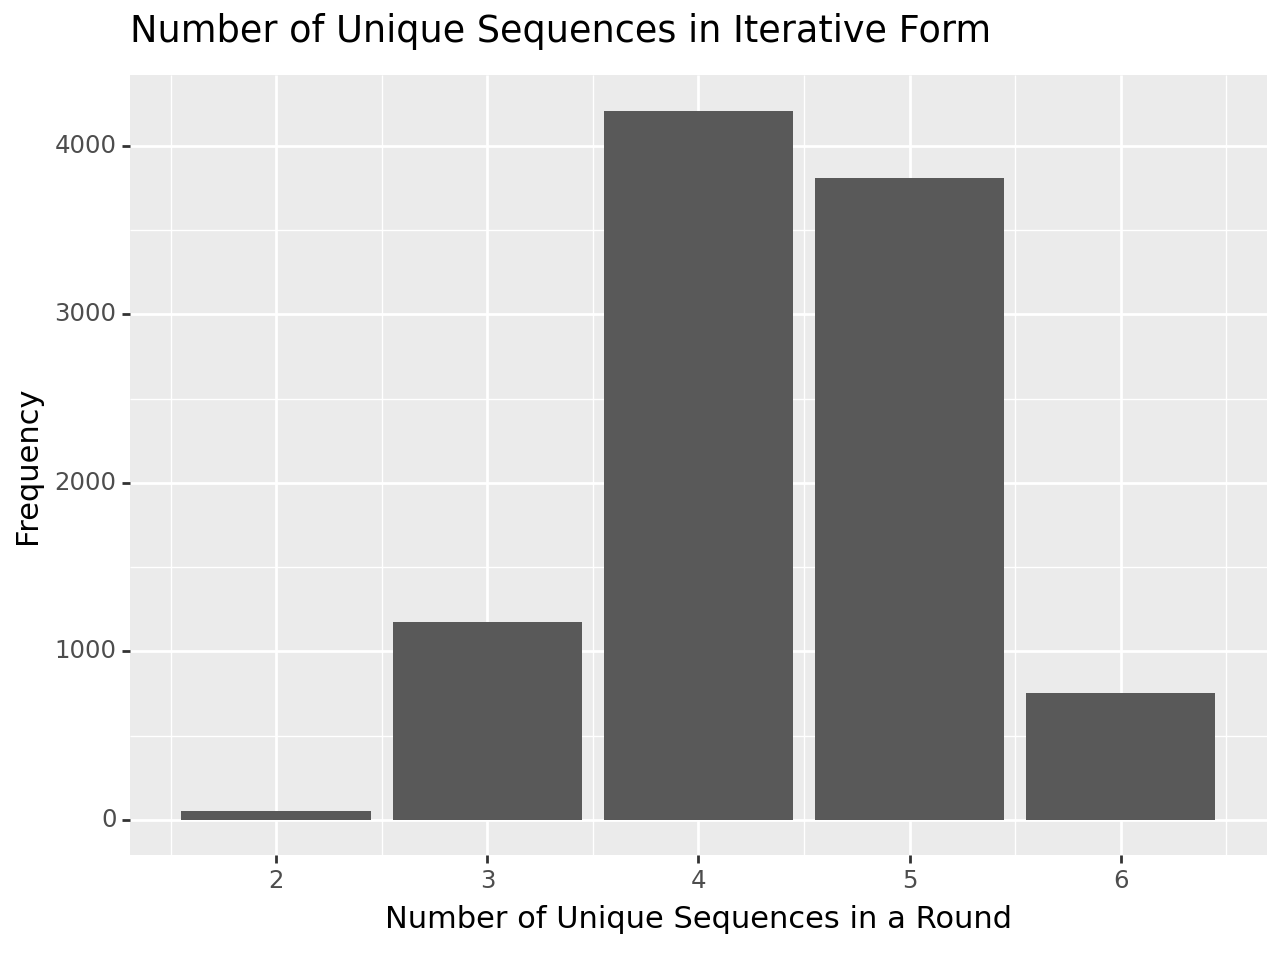


Mean: 4.4033
Lower 95 CI: 2.779582017711018
Upper 95 CI: 6.027017982288982


/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/uniques0.png


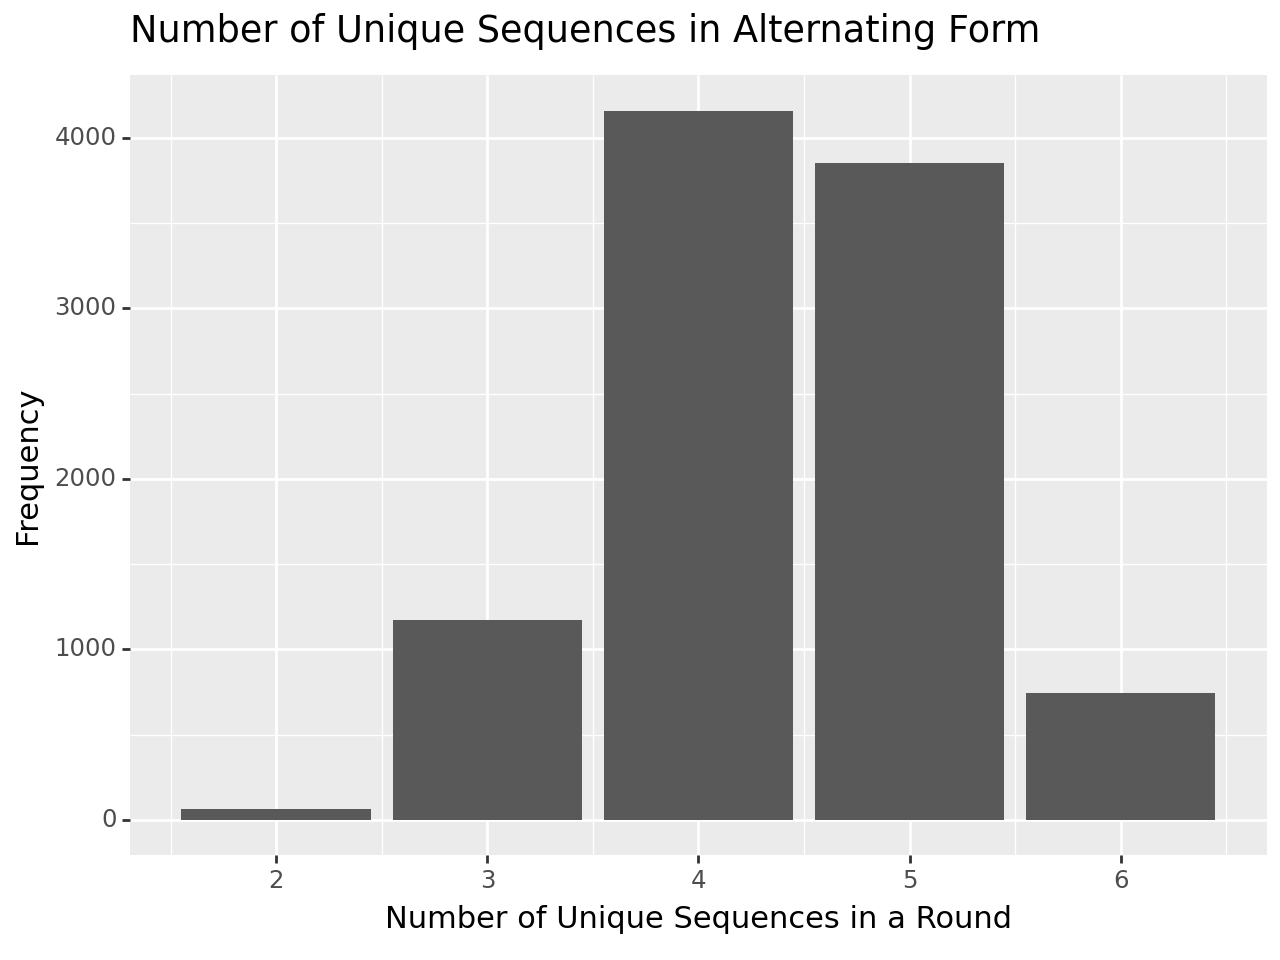


Mean: 4.4039
Lower 95 CI: 2.77266572727114
Upper 95 CI: 6.03513427272886


/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /content/uniques1.png


In [ ]:
import collections
from plotnine import ggplot, aes, geom_bar, stat_bin, ggsave, ggtitle, xlab, ylab
import matplotlib.pyplot as plt


#Visualization

#plt.bar(times[0].keys(), times[0].values(), 1.0, edgecolor='g')
#plt.figure().set_figwidth(15)
#plt.show()

for i in range(n):
    #plt.figure().set_figwidth(15)
    #plt.hist(myset[k][i], rwidth=0.7)
    #plt.gca().grid(True)
    #plt.show()

    # raw strings
    #print(myset[k][i])
    #for (key, value) in collections.Counter(myset[k][i]).items():
    #  print(key, " -> ", value)
#
    #myDictionary = collections.Counter(myset[k][i])
    #plt.figure().set_figwidth(15)
    #plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, edgecolor='g')
    #plt.title("Histogram of raw strings")
    #plt.xlabel("String")
    #plt.ylabel("Count")
    #plt.show()



    """
    sa = pd.DataFrame(sim_avgs)
    plot_sa = ggplot(sa) + aes(x=sa[0]) + stat_bin(bins=1000) + geom_bar() + ggtitle(f'Simulation Averages for i={i}')
    plot_sa.show()
    print(sa.describe())
    std = sa[0].std()
    mean = sa[0].mean()
    print("Lower 95 CI:", mean - 2 * std)
    print("Upper 95 CI:", mean + 2 * std)
    plot_sa.save(filename="sim_avg" + str(i) + ".png", path=os.getcwd())
    """
    letterdict = {
        0: "Iterative",
        1: "Alternating",
        2: "Palindromic",
        3: "Random",
        4: "Stack",
        5: "Queue"
    }
    # unique seqs
    un = pd.DataFrame(uniques[i])
    plot_un = ggplot(un) + aes(x=un[0]) + stat_bin(bins=10) + geom_bar() + ggtitle(f'Number of Unique Sequences in {letterdict[i]} Form') + xlab("Number of Unique Sequences in a Round") + ylab("Frequency")
    print(plot_un)
    stdu  = un[0].std()
    meanu = un[0].mean()
    print("Mean:",meanu)
    print("Lower 95 CI:", meanu - 2 * stdu)
    print("Upper 95 CI:", meanu + 2 * stdu)
    plot_un.save(filename="uniques" + str(i) + ".png", path=os.getcwd())